# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

# Image normalize 

# 轉換label 為OneHot Encoding

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()
print('train:',len(x_img_train))
print('test :',len(x_img_test))

169009152/169001437 [==============================] - 71s 0us/step
train: 50000
test : 10000


In [13]:
x_img_train.shape

(50000, 32, 32, 3)

In [14]:
y_label_train.shape

(50000, 1)

In [15]:
x_img_test.shape

(10000, 32, 32, 3)

In [16]:
y_label_test.shape

(10000, 1)

In [25]:
#針對物件圖像數據集的類別編列成字典

label_dict={0
,
1
,
2
,
3
,
4
,
5
,
6
,
7
,
8
,
9
,
10
,
11
,
12
,
13
,
14
,
15
,
16
,
17
,
18
,
19
,
20
,
21
,
22
,
23
,
24
,
25
,
26
,
27
,
28
,
29
,
30
,
31
,
32
,
33
,
34
,
35
,
36
,
37
,
38
,
39
,
40
,
41
,
42
,
43
,
44
,
45
,
46
,
47
,
48
,
49
,
50
,
51
,
52
,
53
,
54
,
55
,
56
,
57
,
58
,
59
,
60
,
61
,
62
,
63
,
64
,
65
,
66
,
67
,
68
,
69
,
70
,
71
,
72
,
73
,
74
,
75
,
76
,
77
,
78
,
79
,
80
,
81
,
82
,
83
,
84
,
85
,
86
,
87
,
88
,
89
,
90
,
91
,
92
,
93
,
94
,
95
,
96
,
97
,
98
,
99}

In [43]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

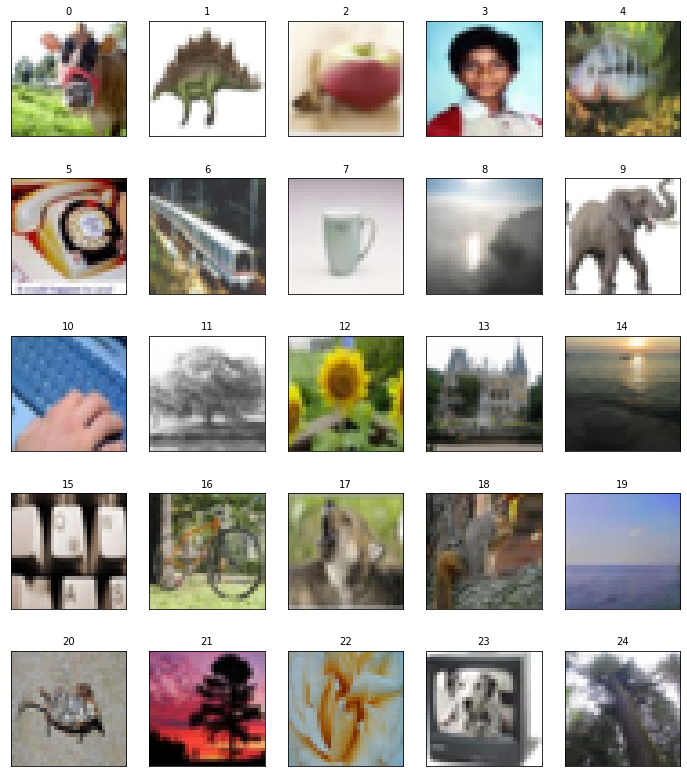

In [44]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [12]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


In [19]:
x_img_train[0][0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 252, 248],
       [231, 222, 213],
       [176, 168, 163],
       [237, 236, 235],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [252, 255, 255],
       [242, 252, 252],
       [229, 240, 234],
       [195, 205, 193],
       [212, 224, 204],
       [182, 194, 167]], dtype=uint8)

In [20]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [21]:
x_img_train_normalize[0][0]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.9882353 , 0.972549  ],
       [0.90588236, 0.87058824, 0.8352941 ],
       [0.6901961 , 0.65882355, 0.6392157 ],
       [0.92941177, 0.9254902 , 0.92156863],
       [1.        , 1.        , 1.        ],
       [1.

In [22]:
y_label_train.shape

(50000, 1)

In [23]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [24]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.